# Purpose of this simulation


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import aopy
import sklearn

# so that we write in latex
from matplotlib import rc

rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

import numpy as np
np.set_printoptions(precision=5, suppress=True)
sns.set_context('talk')

# ideas

In [113]:
# this is for creating exp_conditions that scan the difference across the files
#for comparision
#data_dump_folder = '/home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/more_neurons/run_3/'
# data_dump_folder = \
# 'D:/sim_data/gaussian_peaks/2022_02_02_gaussian_peaks/'

data_dump_folder = \
        '/home/sijia66/data/encoder_dev/'



ROUND_DECIMALS = 3


random_seed = 1
n_neurons = 128

# clda setup 
rho = 0.5
batchlen = 100
feature_selection_method = "joint_convex"
encoder_change_mode = "shuffle_rows"

# noises = np.arange(9)
# noises = np.exp2(noises)
noises = [32]
noise = 32

# we set up the neural populations
mean_first_peak = 50
mean_second_peak = 100
std_of_peaks = 3

# feature_selection_method 
feature_selection_method = "full"
exp_conds = []

# uncomment out this to compare to the full feature selection method
# exp_conds_wo = [f'{feature_selection_method}_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std_of_peaks}_clda_rho_{rho}_batchlen_{batchlen}_{encoder_change_mode}' ]
# exp_conds += exp_conds_wo


# parameters for smoothe convex optimization
feature_selection_method = "joint_convex"
sparsity_array = [0.125]
# sparsity_array = np.arange(0.05, 0.15, 0.01)
# decay_factor_array  = np.arange(0, 1.2, 0.2)
# decay_factor_array = np.round(decay_factor_array, ROUND_DECIMALS)
decay_factor_array = [0.5]


#smoothness_array =  np.arange(0.025, 0.15, 0.025)
smoothness_array = [0.05]
num_lags_array = [3]
num_of_features = 32 # specify how many features we want to use, or None


for sparsity_val in sparsity_array:
    for smoothness_val in smoothness_array:
        for num_lag in num_lags_array:
            for decay_factor in  decay_factor_array:



                    exp_conds_wo = [f'{feature_selection_method}_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std_of_peaks}_clda_rho_{rho}_batchlen_{batchlen}_sparsity_{sparsity_val}_smooth_{smoothness_val}_lags_{num_lag}_decay_{decay_factor}_num_feats_{num_of_features}_{encoder_change_mode}' ]
                    # exp_conds_add = [f'iter_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std}_clda_rho_{rho}_batchlen_{batchlen}_sparsity_{sparsity_val}_smooth_{smoothness_val}_lags_{num_lag}_decay_{decay_factor}_num_feats_{num_of_features}' ]
                    # exp_conds_keep = [f'same_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std}_clda_rho_{rho}_batchlen_{batchlen}_sparsity_{sparsity_val}_smooth_{smoothness_val}_lags_{num_lag}_decay_{decay_factor}_num_feats_{num_of_features}']

                    # we add to the exp list
                    exp_conds.extend(exp_conds_wo)
                    # exp_conds.extend(exp_conds_add)
                    # exp_conds.extend(exp_conds_keep)

# feature_selection_schemes = ['Full set', 'Smooth convex selection', 'Lasso selection']
feature_selection_schemes = [ 'Smooth convex selection', 'Lasso selection'] 

NUM_SPARSITY, NUM_SMOOTH = len(sparsity_array), len(smoothness_array)

lasso_alphas = [10]
lasso_thresholds = [2.5]
more_exp_conds = []
for lasso_alpha in lasso_alphas:
    for lasso_threshold in lasso_thresholds:
        more_exp_conds.append(f'lasso_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std_of_peaks}_clda_rho_{rho}_batchlen_{batchlen}_lasso_alpha_{lasso_alpha}_lasso_threshold_{lasso_threshold}_{encoder_change_mode}')

exp_conds += more_exp_conds
print("the folder at which data is located:")
print(data_dump_folder)
print(f"we have {len(exp_conds)}" , f"num of sparsity vals {NUM_SPARSITY}", f'num of smoothness vals {NUM_SMOOTH}')
for e in exp_conds:print(e)

the folder at which data is located:
/home/sijia66/data/encoder_dev/
we have 2 num of sparsity vals 1 num of smoothness vals 1
joint_convex_1.0_1_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.125_smooth_0.05_lags_3_decay_0.5_num_feats_32_shuffle_rows
lasso_1.0_1_noise_32_128_100_3_clda_rho_0.5_batchlen_100_lasso_alpha_10_lasso_threshold_2.5_shuffle_rows


In [93]:

from afs_files import load_feature_selection_files
(exp_data_all, exp_metadata_all) = load_feature_selection_files(data_dump_folder, exp_conds)
print(f'we collected {len(exp_data_all)} number of experiments')

we collected 2 number of experiments


# Check feature selection strategies

## check feature weights 

In [94]:
feature_weights = exp_data_all[0]['feature_selection']['feature_weights']
exp_data_all[0]['feature_selection'].keys()
new_sim_c = exp_data_all[0]['feature_selection']['new_sim_c']
sim_C = exp_data_all[0]['feature_selection']['sim_C']

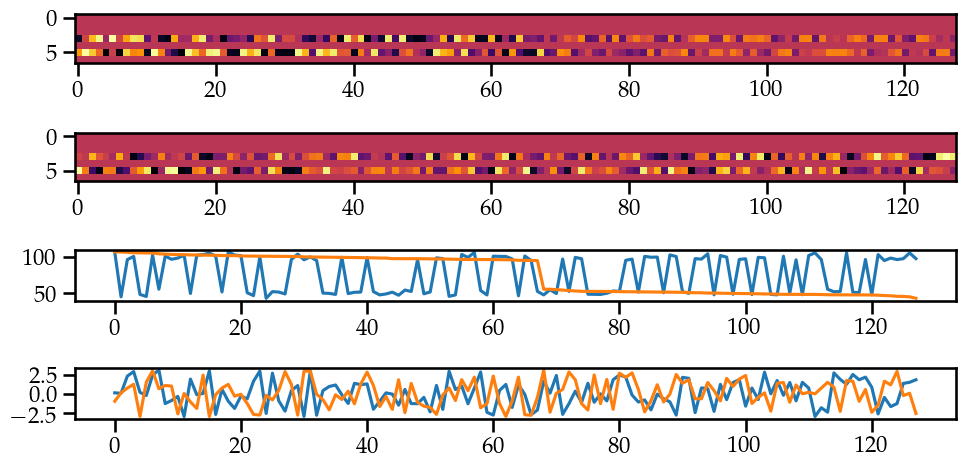

In [95]:
fig, ax = plt.subplots(4, 1, figsize=(10, 5))
ax[0].imshow(sim_C.T)
old_tuning = np.linalg.norm(sim_C, axis=1)
ax[1].imshow(new_sim_c.T)

new_tuning = np.linalg.norm(new_sim_c, axis=1)
ax[2].plot(new_tuning)
ax[2].plot(old_tuning)

ax[3].plot((np.arctan2(new_sim_c[:, 3], new_sim_c[:, 5])))
ax[3].plot((np.arctan2(sim_C[:, 3], sim_C[:, 5])))

fig.tight_layout()


Text(0.5, 1.0, 'Feature distribution std 3 Hz')

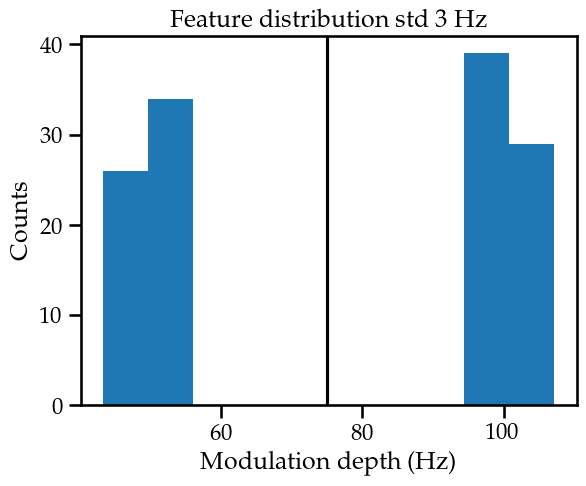

In [105]:
# plot the histogram of the feature weights

std = std_of_peaks

fig_weight, ax_weight = plt.subplots()
ax_weight.hist(feature_weights)
ax_weight.axvline(x = 75, color = 'k')
ax_weight.set_xlabel('Modulation depth (Hz)')
ax_weight.set_ylabel('Counts')
ax_weight.set_title(f'Feature distribution std {std} Hz')

## check between conditions

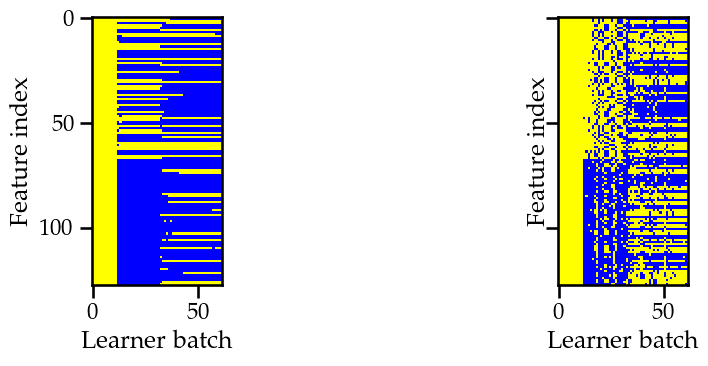

In [106]:
import importlib 
from afs_plotting import plot_feature_selection

if len(exp_data_all) ==  1:
    plot_feature_selection(exp_data_all[0]['feature_selection']['feat_set'])
else:
    
    num_columns = len(exp_data_all)

    fig_feat_activity, ax_feat_activity = plt.subplots(1, num_columns, 
                                                    sharey = True,
                                                    figsize = (12, 4))



    for i, (e, a) in enumerate(zip(exp_data_all,  ax_feat_activity)):
        plot_feature_selection(e['feature_selection']['feat_set'], ax = a)
        
        #only title the exp if there are three exp, right. 
        #a.set_title(np.round(s, decimals = ROUND_DECIMALS))

    fig_feat_activity.tight_layout()


In [98]:
# we calculate the smoothness metric 
# copy and paste for now,  we can potentially do this online.

    
def calculate_feature_smoothness(matrix_feature_by_batch:np.ndarray, mode:str = "compare_to_first_batch") ->  np.ndarray:
    """
    use jaccard similarity score to compare later feature selection batches to the very first one batch
    mode: str: incremental between batches
    """
    # for now, only support two dim array, the array dim is defined as  feature by batch 
    assert matrix_feature_by_batch.ndim == 2
    
    if mode == "incremental":
        smoothness_score = np.zeros(matrix_feature_by_batch.shape[1] - 1)
        for i in range(matrix_feature_by_batch.shape[1] - 1):
            smoothness_score[i] = sklearn.metrics.jaccard_score(matrix_feature_by_batch[:,i], 
                                                                matrix_feature_by_batch[:,i+1])
    else: # otherwise, we compare to the very first one
        initial_batch = matrix_feature_by_batch[:, 0]
        smoothness_score = np.zeros(matrix_feature_by_batch.shape[1])
        for i in range(matrix_feature_by_batch.shape[1]):

            smoothness_score[i] = sklearn.metrics.jaccard_score(matrix_feature_by_batch[:,i], initial_batch)

    return smoothness_score
    
    
def calculate_feature_smoothness_multiple_conditions(matrix_cond_by_feature_by_batch:np.ndarray, **kwargs) -> np.ndarray:

    num_conds, _, _  = matrix_cond_by_feature_by_batch.shape

    smooth_batch_arrays = []

    for i in range(num_conds):
        smooth_batch_arrays.append(calculate_feature_smoothness(matrix_cond_by_feature_by_batch[i, :, :], **kwargs))

    return np.array(smooth_batch_arrays)


In [107]:
# next question I ask,  how many features are being selected, anyway? 
num_features_exp_by_batch = []

selected_feature_batches = [exp_data_all[i]['feature_selection']['feat_set'] for i in range(len(exp_data_all))]

for i,e in enumerate(exp_data_all):

    active_set = e['feature_selection']['feat_set']

    num_features_over_batch = np.sum(active_set, axis = 1)
    num_features_exp_by_batch.append(num_features_over_batch.copy())



num_features_exp_by_batch = np.array(num_features_exp_by_batch)
selected_feature_batches = np.array(selected_feature_batches)

In [108]:
print(selected_feature_batches.shape)

selected_features_conds_by_feature_batches = np.moveaxis(selected_feature_batches, 1, 2)


smoothness_conds_by_batch = \
calculate_feature_smoothness_multiple_conditions(selected_features_conds_by_feature_batches, mode = "incremental")

print(smoothness_conds_by_batch.shape)

(2, 62, 128)
(2, 61)


/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: Futur

Text(0.5, 1.0, '')

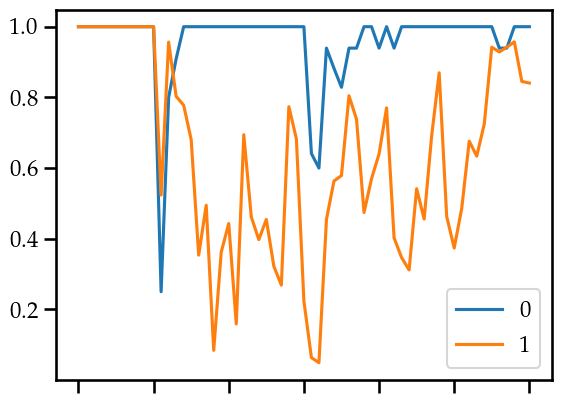

In [109]:
#sns.set_palette("Blues")

ax  = sns.lineplot(data = smoothness_conds_by_batch.T, dashes=False)
ax.set_xticklabels(sparsity_array)
ax.set_title("")

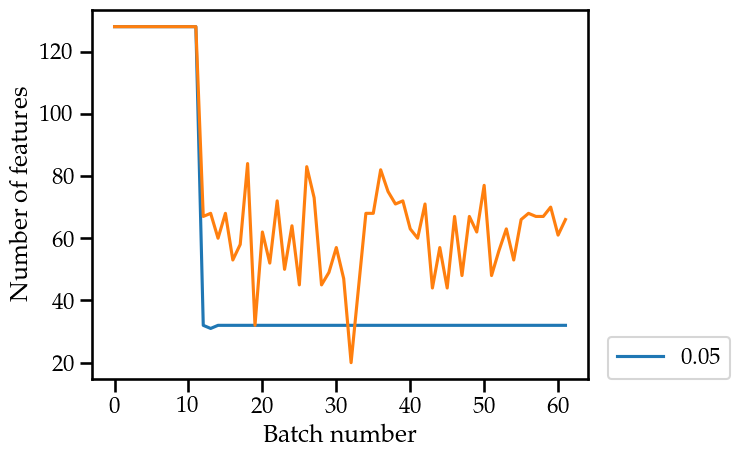

In [110]:
fig_num_features, ax_num_features = plt.subplots()

ax_num_features.plot(num_features_exp_by_batch.T)

ax_num_features.set_xlabel('Batch number')
ax_num_features.set_ylabel('Number of features')
ax_num_features.legend(np.round(smoothness_array,ROUND_DECIMALS), loc=(1.04,0))


# Behaviour comparision

## count how many rewards

In [111]:
fps = 60

reward_rate_all = list()
window_time_stamps_all = list()
NUM_EXP = len(exp_data_all)

total_rewards_all = list()

for i in range(NUM_EXP):

    time_stamps = exp_data_all[i]['events']['time'] / fps
    events = exp_data_all[i]['events']['event']
    
    
    num_rewards = np.count_nonzero(events == b'REWARD')

    (reward_rate, window_time_stamps) = aopy.analysis.calc_running_event_rate(b'REWARD', events, time_stamps, 
                                                                window_size= 120,
                                                                 window_step= 30)
    reward_rate_all.append(reward_rate)
    window_time_stamps_all.append(window_time_stamps)
    total_rewards_all.append(num_rewards)


window_stamps_all = np.array(window_time_stamps_all)
reward_rate_all = np.array(reward_rate_all) 
reward_rate_all = reward_rate_all.reshape((NUM_EXP,-1))
window_stamps_all = window_stamps_all.reshape((NUM_EXP,-1))

total_rewards_all = np.array(total_rewards_all)

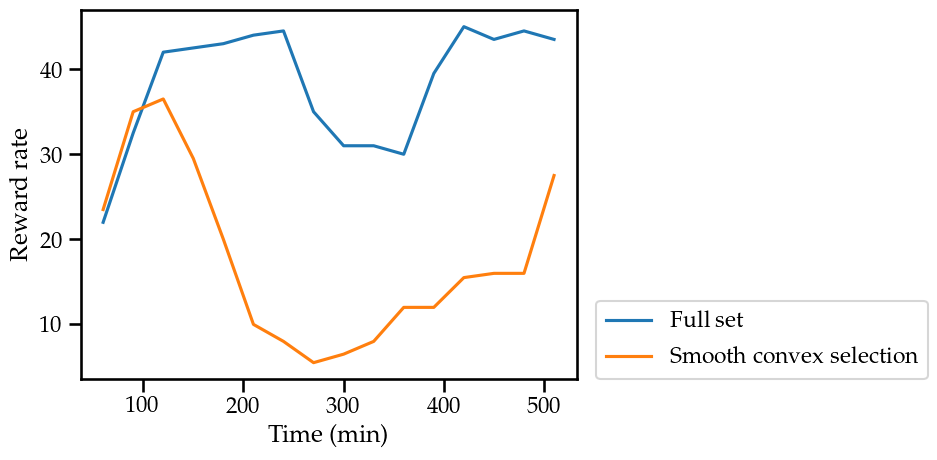

In [112]:
colors = ['blue', 'orange', 'red']

plt.plot(window_time_stamps, reward_rate_all.T)
plt.xlabel('Time (min)')
plt.ylabel('Reward rate ')
plt.legend(feature_selection_schemes, 
           loc=(1.04,0))


In [454]:
reward_rate_all.shape

(2, 16)

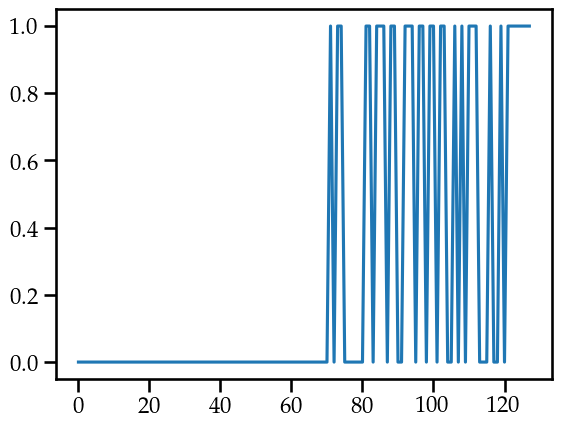

In [148]:
threshold = 90

good_features_list = list()
for i in range(2):
    sim_c = exp_data_all[i]['feature_selection']['sim_C']
    new_sim_c = exp_data_all[i]['feature_selection']['new_sim_c']
    good_features_initial = (np.linalg.norm(sim_c, axis=1) >threshold)
    good_features_after_shuffled = (np.linalg.norm(new_sim_c, axis=1) >threshold)
    
    good_features_list.append(good_features_after_shuffled.copy())


# plot_feature_selection(np.array(good_features_list).T)

features_present_in_both = np.logical_and(good_features_initial, good_features_after_shuffled)
new_features_after_shuffled = np.logical_and(np.logical_not(features_present_in_both), good_features_after_shuffled)
old_features_before_shuffled = np.logical_and(good_features_initial, np.logical_not(features_present_in_both))
plt.plot(new_features_after_shuffled)


In [141]:
new_features_after_shuffled.shape, old_features_before_shuffled.shape

((128,), (128,))

In [154]:
nnum_of_repeats_before,  num_of_repeats_after= 30, 30


old_features_before_shuffled_repeat = np.repeat(good_features_initial[:, np.newaxis],
                                                nnum_of_repeats_before, axis = 1)
new_features_after_shuffled_repeat = np.repeat(good_features_after_shuffled[:, np.newaxis],
                                                num_of_repeats_after, axis = 1)

encoder_weight_change = np.concatenate((old_features_before_shuffled_repeat,
                                        new_features_after_shuffled_repeat), axis = 1)

encoder_weight_change.shape

(128, 60)

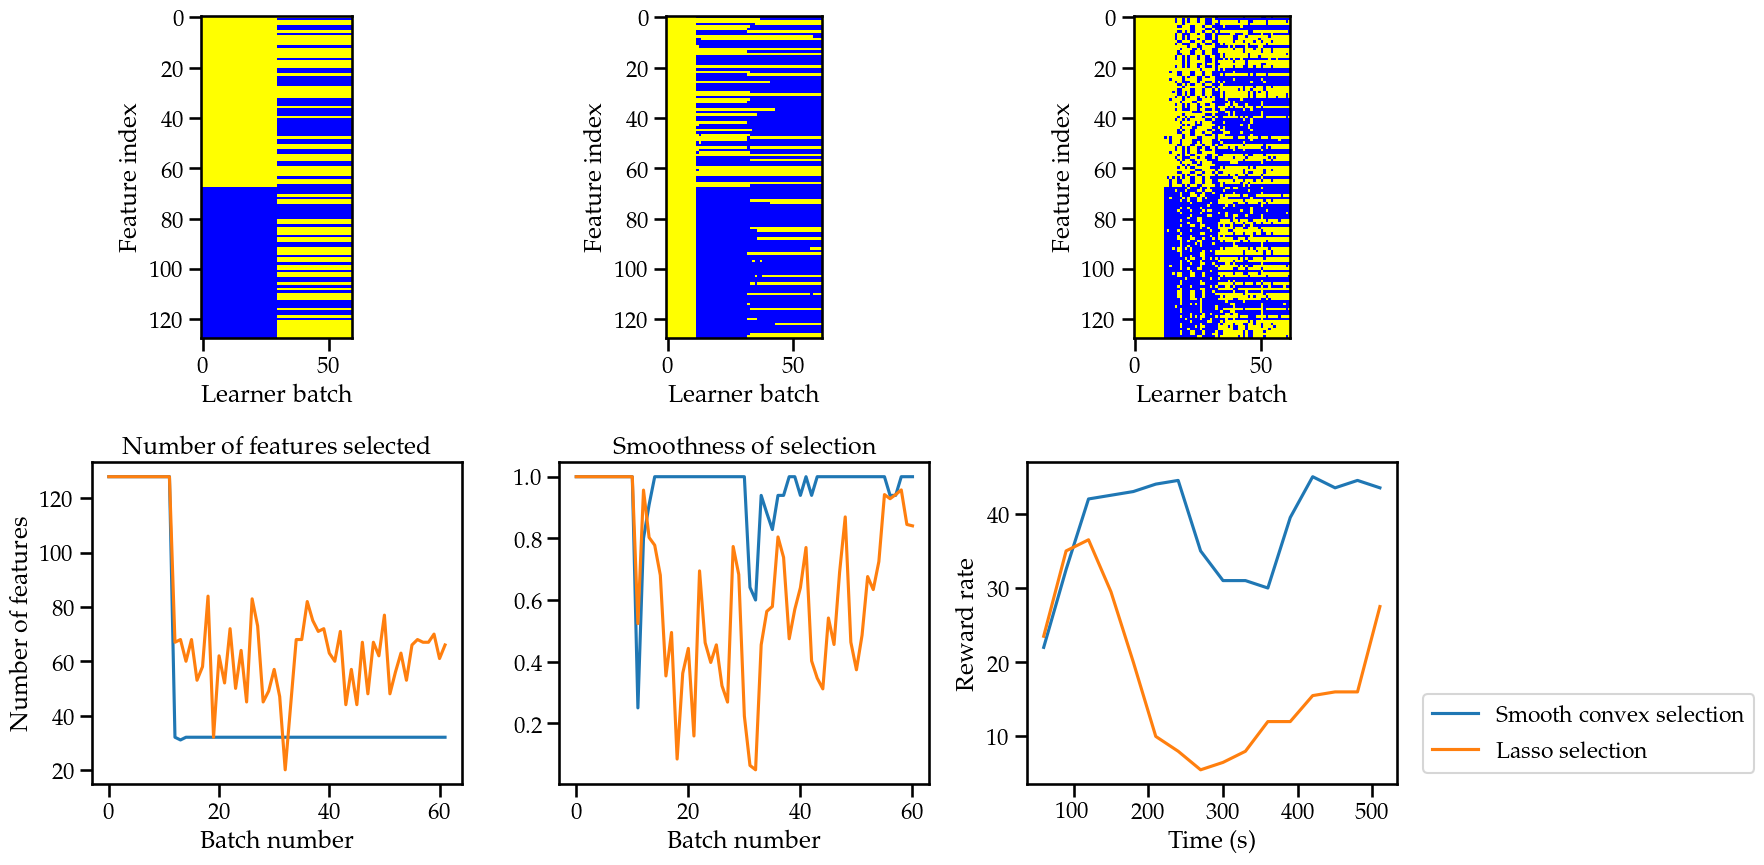

In [155]:
# let's make a summary plot
summary_figure, summary_axes = plt.subplots(2, 3, figsize = (18, 9))

plot_feature_selection(encoder_weight_change.T, ax = summary_axes[0,0])


for i, (e, a) in enumerate(zip(exp_data_all,  summary_axes[0,1:])):
    plot_feature_selection(e['feature_selection']['feat_set'], ax = a)
    
    #only title the exp if there are three exp, right. 
    #a.set_title(np.round(s, decimals = ROUND_DECIMALS))

# number of features selected
summary_axes[1,0].plot(num_features_exp_by_batch.T)
summary_axes[1,0].set_xlabel('Batch number')
summary_axes[1,0].set_ylabel('Number of features')
summary_axes[1,0].set_title('Number of features selected')
# plot the 


# plot the smoothness of the features
summary_axes[1,1].plot(smoothness_conds_by_batch.T)
summary_axes[1,1].set_xlabel('Batch number')
summary_axes[1,1].set_title('Smoothness of selection')

# plot the reward rate
summary_axes[1,2].plot(window_time_stamps, reward_rate_all.T)
summary_axes[1,2].set_ylabel('Reward rate')
summary_axes[1,2].set_xlabel('Time (s)')

summary_axes[1,2].legend(feature_selection_schemes, bbox_to_anchor=(1.04,0), loc="lower left")

# plot the reward rate
summary_figure.tight_layout()

In [156]:
plt.savefig('encoder_change_summary_figure.pdf', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

## Trial segments and trajectories

In [17]:
CENTER_TARGET_ON = 16
CURSOR_ENTER_CENTER_TARGET = 80
CENTER_TARGET_OFF = 32
REWARD = 48
DELAY_PENALTY = 66
TIMEOUT_PENALTY = 65
HOLD_PENALTY = 64
TRIAL_END = 239

import functools

def get_all_cursor_trajectories(exp_data_all, start_code = [20], end_codes = [REWARD, HOLD_PENALTY]):
    
    cursor_trajectories_list = list()
        
    for e in exp_data_all:
        (cursor_trajectories, trial_segments, trial_times) = get_cursor_trajectories_from_parsed_data(e, start_code = start_code, end_codes=end_codes)
        cursor_trajectories_list.append(cursor_trajectories)

    
    return cursor_trajectories_list

def get_cursor_trajectories_from_parsed_data(exp_data, start_code = [20], end_codes = [REWARD, HOLD_PENALTY]):
    
    
    events = exp_data['events']
    cursor_kinematics = exp_data['task']['cursor'][:,[0,2]] # cursor (x, z, y) position on each bmi3d cycle

    streamed_code = events['code']
    event_cycles = events['time'] # confusingly, 'time' here refers to cycle count

    trial_segments, trial_times = aopy.preproc.get_trial_segments(streamed_code, event_cycles, start_code,  end_codes)
    trial_segments = np.array(trial_segments)
    trial_indices = [range(t[0], t[1]) for t in trial_times]
    cursor_trajectories = [cursor_kinematics[t] for t in trial_indices]
    
    return (cursor_trajectories, trial_segments, trial_times)

In [18]:
start_codes = range(17, 24)
print(start_codes)

cursor_trajectories_list = get_all_cursor_trajectories(exp_data_all, start_code=start_codes)


range(17, 24)


/tmp/ipykernel_3290/3248736103.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  trial_segments = np.array(trial_segments)


In [19]:
def calc_trial_times(trial_times):
    """
    for each row, calculate the difference between the last and first elements
    """
    row_index = 1 
    
    return np.apply_along_axis(lambda row: row[-1] - row[0], row_index, trial_times)


#calc_trial_times(trial_times)

In [20]:
# get the unique target positions

from typing import List, Dict
import seaborn as sns


def plot_cursor_trajectories(cursor_trajectories: List, exp_data:Dict, exp_metadata,ax = None):

    fig, ax = plt.subplots(figsize=(10,10))

    trials = exp_data['trials']
    trial_targets = aopy.postproc.get_trial_targets(trials['trial'], trials['target'][:,[0,2]]) # (x, z, y) -> (x, y)
    unique_targets = np.unique(np.concatenate(([t[1] for t in trial_targets], trial_targets[0])), axis=0)


    target_radius =  exp_metadata['target_radius']
    bounds = [-11, 11, -11, 11]
    
    sns.color_palette("dark:salmon_r", as_cmap=True)

    aopy.visualization.plot_trajectories(cursor_trajectories, bounds = bounds, ax = ax)
    aopy.visualization.plot_targets(unique_targets, target_radius, ax = ax)

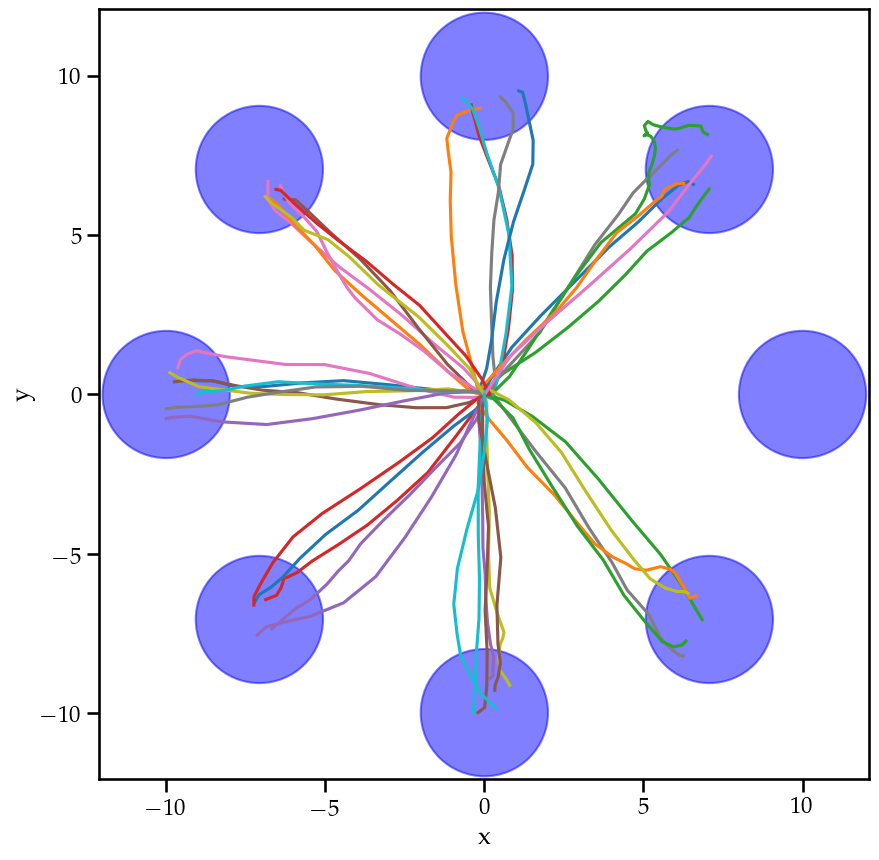

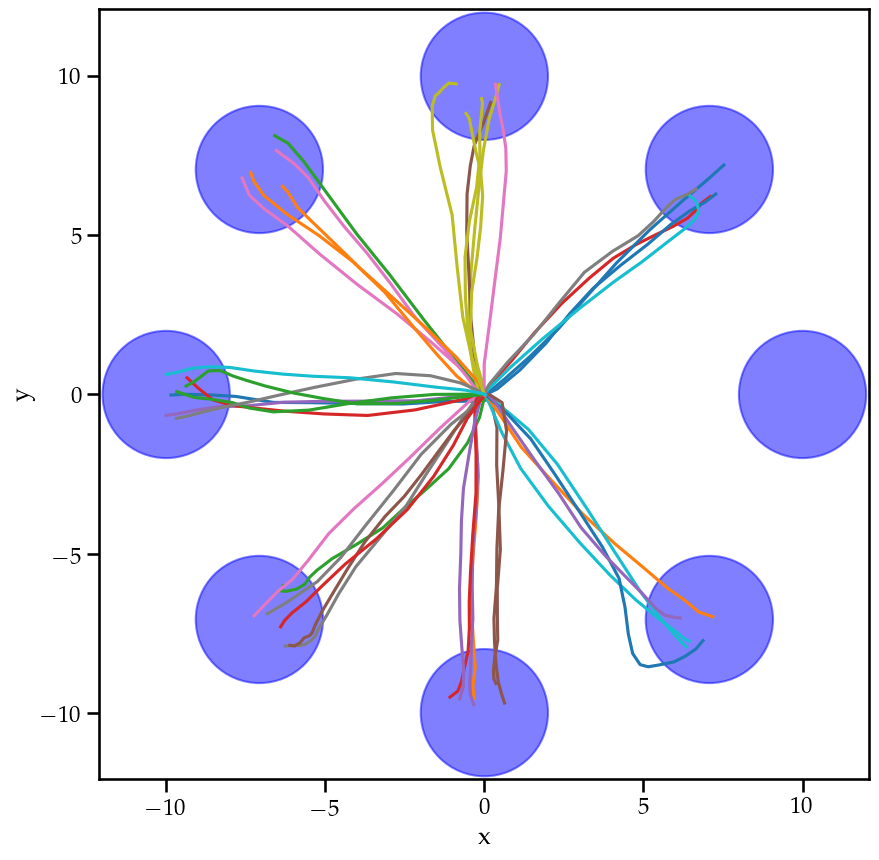

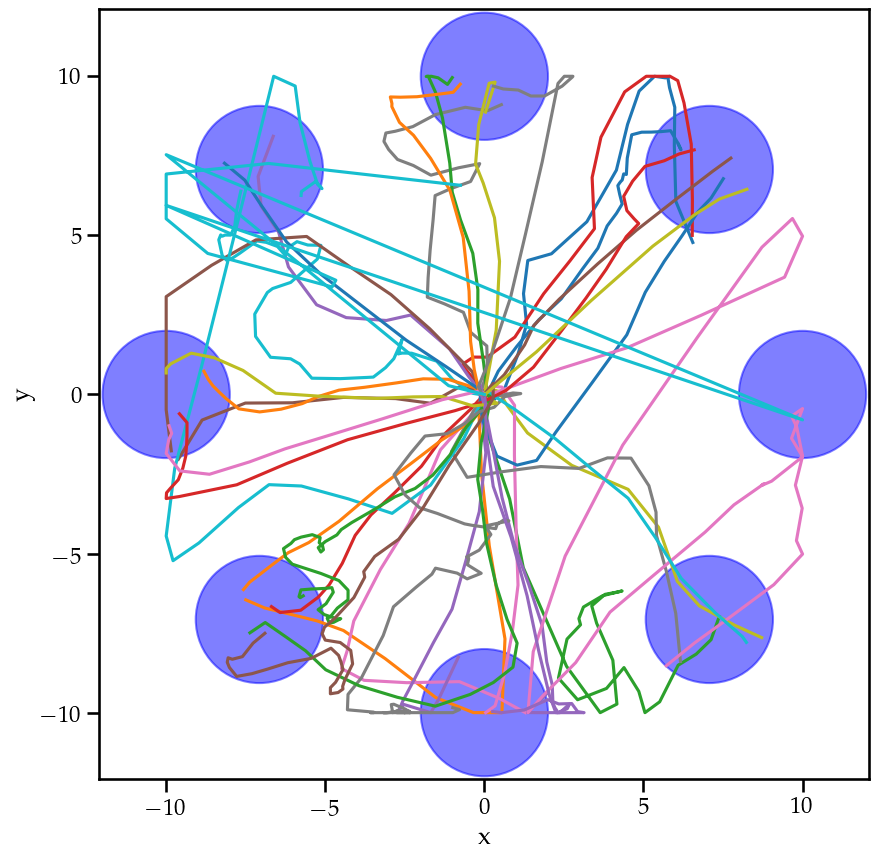

In [217]:
#cursor_trajectories_list = np.array(cursor_trajectories_list).reshape(2, -1)



for c in cursor_trajectories_list:
    plot_cursor_trajectories(c[-100:-60], exp_data_all[0], exp_metadata_all[0])

## encoder

the job of the encoder is to directly encode intention into firing rates
the direct measure is just pearson correlation coefficients between 
the intentions and the firing rates

## decoder

In [233]:
exp_data_all[0]['feature_selection'].keys()

dict_keys(['C_mat', 'K_mat', 'Q_diag', 'assist_level', 'batch_size', 'batch_time', 'change_sim_c_at_cycle', 'feat_set', 'feature_weights', 'fixed_noise_level', 'half_life', 'n_starting_feats', 'n_states', 'new_sim_c', 'no_noise_neuron_ind', 'noise_mode', 'noise_neuron_ind', 'num_of_lags', 'number_of_features', 'objective_offset', 'past_batch_decay_factor', 'percent_noise', 'sim_C', 'smoothness_coef', 'sparsity_coef', 'threshold_selection', 'total_exp_time', 'train_high_SNR_time', 'transform_x_flag', 'transform_y_flag'])

(61, 128, 7)


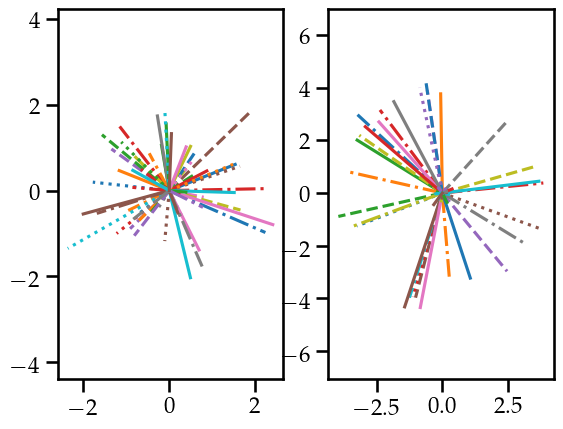

In [234]:
from afs_plotting import plot_prefered_directions

C_mat = exp_data_all[1]['feature_selection']['C_mat']

print(C_mat.shape)



fig, ax = plt.subplots(1,2)

plot_prefered_directions(C_mat[0], ax = ax[0])
plot_prefered_directions(C_mat[-1], ax = ax[1])

In [ ]:
from afs_plotting import plot_prefered_directions

def plot_all_initial_C_mat(exp_data_all, selected_neuron = 'all',debug = True):
    
    """
    just compare initial C mat with the last C_mat
    """
    
    N_EXP = len(exp_data_all)
    
    fig, ax = plt.subplots(2, N_EXP)
    
    for i in range(N_EXP):
        C_mat = exp_data_all[i]['feature_selection']['C_mat']
        plot_prefered_directions(C_mat[0][no_noise_neuron_ind,:], ax = ax[0,i])
        plot_prefered_directions(C_mat[-1][no_noise_neuron_ind,:], ax = ax[1,i])
        

plot_all_initial_C_mat(exp_data_all)


## Decoder compared to the encoder



In [27]:
exp_data_all[0].keys()

dict_keys(['bmi3d_task', 'bmi3d_state', 'bmi3d_clock', 'bmi3d_events', 'bmi3d_trials', 'task', 'state', 'clock', 'events', 'trials', 'feature_selection'])

In [28]:
no_noise_neuron_ind = exp_data_all[0]['feature_selection']['no_noise_neuron_ind']

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67]])

<class 'matplotlib.axes._subplots.AxesSubplot'>
(3, 128)


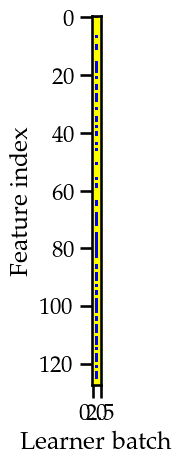

In [208]:
# calculate the features which have been selected at least once
START_BATCH = 12

selected_features_all = list()
for e in exp_data_all:
    active_set = e['feature_selection']['feat_set']
    selected_features = np.logical_or.reduce(active_set[START_BATCH:,:], axis=0)
    #plot_feature_selection(active_set[START_BATCH:,:])
    selected_features_all.append(selected_features.copy())

selected_features_all = np.array(selected_features_all)
#exp_data_all[0]['feature_selection']['feat_set']
plot_feature_selection(selected_features_all)
print(selected_features_all.shape)


In [304]:
# calculate the features which have been selected at least once
START_BATCH = 12
LAST_FEATURE_BEFORE_SHUFFLE = 30
selected_features_all = list()
selected_features_all_initial = list()
selected_features_all_final = list()
for e in exp_data_all:
    active_set = e['feature_selection']['feat_set']

    selected_features_initial_last = active_set[LAST_FEATURE_BEFORE_SHUFFLE, :]
    selected_features_shuffle_last = active_set[-1, :]
    selected_features_all_initial.append(selected_features_initial_last.copy())
    selected_features_all_final.append(selected_features_shuffle_last.copy())

selected_features_all = np.array(selected_features_all)
selected_features_all_initial = np.array(selected_features_all_initial)
selected_features_all_final = np.array(selected_features_all_final)


In [ ]:
#exp_data_all[0]['feature_selection']['feat_set']
plot_feature_selection(selected_features_all.T)
print(selected_features_all.shape) 

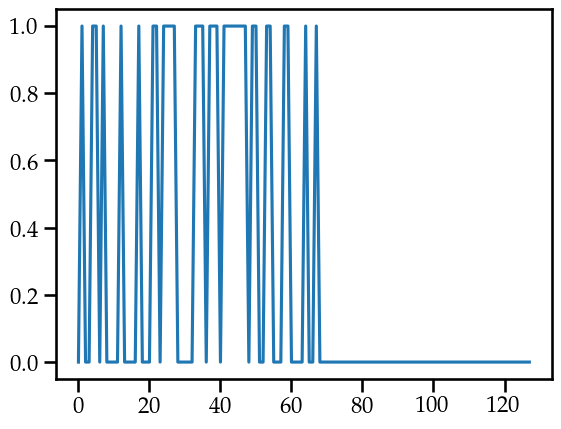

In [286]:
threshold = 90

good_features_list = list()
for i in range(3):
    sim_c = exp_data_all[i]['feature_selection']['sim_C']
    new_sim_c = exp_data_all[i]['feature_selection']['new_sim_c']
    good_features_initial = (np.linalg.norm(sim_c, axis=1) >threshold)
    good_features_after_shuffled = (np.linalg.norm(new_sim_c, axis=1) >threshold)
    
    good_features_list.append(good_features_after_shuffled.copy())


# plot_feature_selection(np.array(good_features_list).T)

features_present_in_both = np.logical_and(good_features_initial, good_features_after_shuffled)
new_features_after_shuffled = np.logical_and(np.logical_not(features_present_in_both), good_features_after_shuffled)
old_features_before_shuffled = np.logical_and(good_features_initial, np.logical_not(features_present_in_both))
plt.plot(old_features_before_shuffled)


In [329]:
import importlib
import convergence_analysis
importlib.reload(convergence_analysis)
from convergence_analysis import calc_cosine_sim_bet_two_matrices, calc_cosine_to_target_matrix

active_angles_list_initial = list()
active_angles_std_list_initial = list()
active_angles_25_list_initial = list()
active_angles_75_list_initial = list()

least_num_updates = 180

for i,(e,s) in enumerate(zip(exp_conds, selected_features_all_initial)):
    
    if i == 0:
        continue
    feature_selection_data = exp_data_all[i]['feature_selection']
    enc_directions = feature_selection_data["sim_C"]
    dec_directions = feature_selection_data['C_mat']
    
    active_set = feature_selection_data['feat_set']
    
    enc_directions = enc_directions[s, :]
    dec_directions = dec_directions[:, s, :]
    
    angles_hist = calc_cosine_to_target_matrix(dec_directions, enc_directions, deg = True)
    
    active_angles = np.nanmedian(angles_hist, axis = 1)
    active_angles_25, active_angles_75 = np.percentile(angles_hist,[25, 75] ,axis = 1)
    active_angles_list_initial.append(active_angles[:least_num_updates].copy())
    active_angles_25_list_initial.append(active_angles_25[:least_num_updates].copy())
    active_angles_75_list_initial.append(active_angles_75[:least_num_updates].copy())

print(enc_directions.shape)
print(dec_directions.shape)
print(angles_hist.shape)
active_angles_list_initial = np.array(active_angles_list_initial)
active_angles_std_list_initial = np.array(active_angles_std_list_initial)
active_angles_25_list_initial = np.array(active_angles_25_list_initial)
active_angles_75_list_initial = np.array(active_angles_75_list_initial)

print(active_angles_std_list_initial.shape, active_angles_list_initial.shape)

(57, 7)
(61, 57, 7)
(61, 57)
(0,) (2, 61)


In [330]:
active_angles_list_after_shuffled = list()
active_angles_25_list_after_shuffled = list()
active_angles_75_list_after_shuffled = list()

least_num_updates = 180

for i,(e,s) in enumerate(zip(exp_conds, selected_features_all_final)):
    
    if i == 0:
        continue
    feature_selection_data = exp_data_all[i]['feature_selection']
    enc_directions = feature_selection_data["new_sim_c"]
    dec_directions = feature_selection_data['C_mat']
    
    enc_directions = enc_directions[s, :]
    dec_directions = dec_directions[:, s, :]
    
    angles_hist = calc_cosine_to_target_matrix(dec_directions, enc_directions, deg = True)
    
    active_angles = np.nanmedian(angles_hist, axis = 1)
    active_angles_25, active_angles_75 = np.percentile(angles_hist,[25, 75] ,axis = 1)
    active_angles_list_after_shuffled.append(active_angles[:least_num_updates].copy())
    
    active_angles_25_list_after_shuffled.append(active_angles_25[:least_num_updates].copy())
    active_angles_75_list_after_shuffled.append(active_angles_75[:least_num_updates].copy())
       
active_angles_list_after_shuffled = np.array(active_angles_list_after_shuffled)
active_angles_25_list_after_shuffled = np.array(active_angles_25_list_after_shuffled)
active_angles_75_list_after_shuffled = np.array(active_angles_75_list_after_shuffled)

Text(0.5, 1.0, 'Shuffled Encoder')

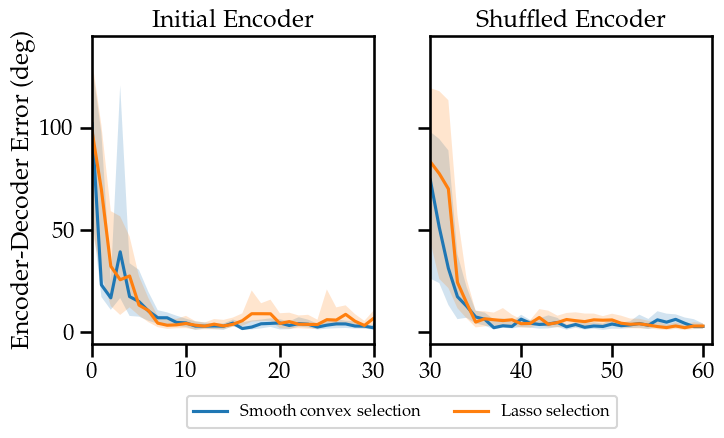

In [336]:
fig_encoder, ax_encoder = plt.subplots(1,2, figsize = (8,4), sharey = True)

ENCODER_CHANGE_AT = 30

for ax, angles,std_25, std_75 in zip(ax_encoder,(active_angles_list_initial.T, active_angles_list_after_shuffled.T), 
                          (active_angles_25_list_initial.T, active_angles_25_list_after_shuffled.T),
                          (active_angles_75_list_initial.T, active_angles_75_list_after_shuffled.T),):
    ax.plot(angles)
    
    for i in range(angles.shape[1]):
        #ax.fill_between(np.arange(angles.shape[0]), angles[:,i] - std_25[:,i], angles[:,i] + std_75[:,i], alpha = 0.2)
        ax.fill_between(np.arange(angles.shape[0]), std_25[:,i], std_75[:,i], alpha = 0.2)
    
    
ax_encoder[0].set_ylabel('Encoder-Decoder Error (deg)')
ax_encoder[0].set_xlim([0,ENCODER_CHANGE_AT])
ax_encoder[1].set_xlim([ENCODER_CHANGE_AT,angles.shape[0]])
plt.legend(feature_selection_schemes[1:], fontsize = 12,
           loc='lower center', 
           ncol = 3, bbox_to_anchor=(-0.1, -0.3))

ax_encoder[0].set_title('Initial Encoder')
ax_encoder[1].set_title('Shuffled Encoder')


In [215]:
feature_selection_schemes

['Full set', 'Smooth convex selection', 'Lasso selection']

## batch update 

In [ ]:
exp_data_all

In [ ]:
len(exp_data_all)

In [17]:
import importlib
import convergence_analysis
importlib.reload(convergence_analysis)
from convergence_analysis import calc_cosine_sim_bet_two_matrices, calc_cosine_to_target_matrix

def train_C_mat_on_batch_data(intended_kin, spike_counts_batch):

    C_hat_list = list()
    
    num_times =  intended_kin.shape[0]
    
    for i  in range(num_times):

        k = intended_kin[i, :,:]
        s = spike_counts_batch[i,:,:]

        C,Q = KalmanFilter.MLE_obs_model(k, s, include_offset=False, drives_obs=[3,5])

        C_hat_list.append(C)



    C_hat_list = np.array(C_hat_list)
    
    return C_hat_list
    

In [18]:
import sympy as sp

clda_log = exp_data_all[0]['bmi3d_clda']
intended_kin = clda_log['intended_kin']
spike_counts_batch = clda_log['spike_counts_batch']
kf_C = clda_log['kf_C']

c_hat_list = train_C_mat_on_batch_data(intended_kin, spike_counts_batch)

NameError: name 'KalmanFilter' is not defined

In [ ]:
c_hat_angles = calc_cosine_to_target_matrix(c_hat_list)

## compare to lasso regularization

In [19]:
from sklearn.linear_model import Lasso, LinearRegression

alpha = 10
max_iteration = 10000

lasso_model = Lasso(alpha, max_iter = max_iteration)
linear_reg_model = LinearRegression()

In [20]:
drive_obs = [3,5]

intended_kin_one_batch = intended_kin[0,drive_obs,:]
spike_counts_one_batch = spike_counts_batch[0,:,:]

lasso_model.fit(intended_kin_one_batch.T, spike_counts_one_batch.T )

Lasso(alpha=10, max_iter=10000)

In [21]:
linear_reg_model.fit(intended_kin_one_batch.T, spike_counts_one_batch.T)

LinearRegression()

In [22]:
# get a series of alphas 

alpha_series = [0, 1, 10, 100] #get a series of alphas

alpha_weights_scan = []

for a in alpha_series:
    lasso_model.set_params(alpha = a)
    lasso_model.fit(intended_kin_one_batch.T, spike_counts_one_batch.T)
    
    alpha_weights_scan.append(lasso_model.coef_.copy())
    
    print(f'finished alpha = {a}')

alpha_weights = np.array(alpha_weights_scan)

finished alpha = 0
finished alpha = 1
finished alpha = 10
finished alpha = 100


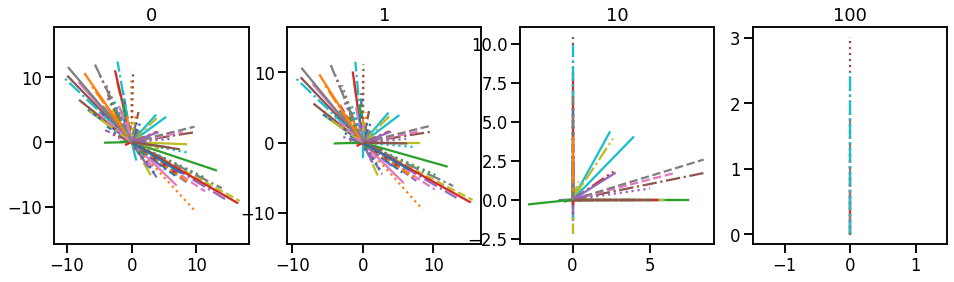

In [23]:
from afs_plotting import plot_prefered_directions

fig, ax = plt.subplots(1, len(alpha_series), figsize = (4 * len(alpha_series), 4))

for a,w,ax_i in zip(alpha_series, alpha_weights_scan, ax):
    plot_prefered_directions(w, ax = ax_i)
    ax_i.set_title(a)


In [24]:
alpha_weights_norm = np.linalg.norm(alpha_weights, axis = 2)

Text(0, 0.5, 'Weight norm')

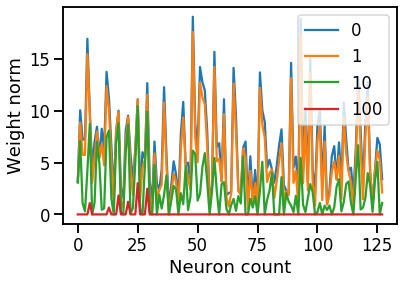

In [25]:
plt.plot(alpha_weights_norm.T)
plt.legend(alpha_series)
plt.xlabel('Neuron count')
plt.ylabel('Weight norm')

In [26]:
# we can then look at lasso path to figure out the smooth coefficients 

from sklearn.linear_model import lasso_path 

eps = 5e-3  # the smaller it is the longer is the path
print("Computing regularization path using the lasso...")
X = intended_kin_one_batch.T
y = spike_counts_one_batch.T
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

print(alphas_lasso.shape,min(alphas_lasso), max(alphas_lasso))
print('shape of coefs_lasso', coefs_lasso.shape)

Computing regularization path using the lasso...
(100,) 55.02534879416641 11005.069758833279
shape of coefs_lasso (128, 2, 100)


(100,)

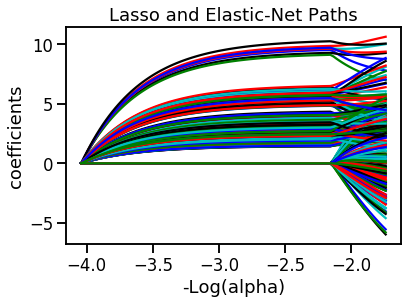

In [27]:

from itertools import cycle

plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, c in zip(coefs_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l.T, c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.axis("tight")

neg_log_alphas_lasso.shape

(128, 100)


(100,)

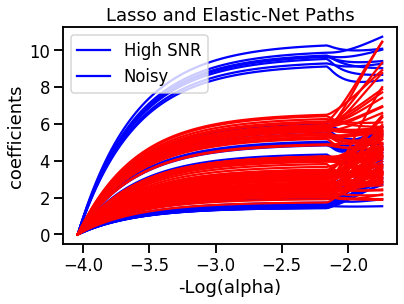

In [28]:
from numpy.linalg import norm

coefs_lasso_norm = norm(coefs_lasso, axis = 1)
print(coefs_lasso_norm.shape)



from itertools import cycle


num_high_snr = 32
num_noise = 96

plt.figure(1)
colors = ['b'] * num_high_snr + ['r'] * num_noise
neg_log_alphas_lasso = -np.log10(alphas_lasso)

for l1_coef, c in zip(coefs_lasso_norm, colors):

    l1 = plt.plot(neg_log_alphas_lasso, l1_coef, c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.axis("tight")
plt.legend(['High SNR', 'Noisy'])
neg_log_alphas_lasso.shape

there are two issue

In [39]:
lasso_hist = feature_selection_data['lasso_hist']

print(lasso_hist.shape)

(240, 2, 128)


##  examine the lasso_hist coefficients.
the main problem is that it does not converge on the fly
it does not converge,  becasue we did not use the right indices to train. 
this can still happen in real time.

this highlights the issue in real time,  we just cannot randomly trained a lasso regression. 


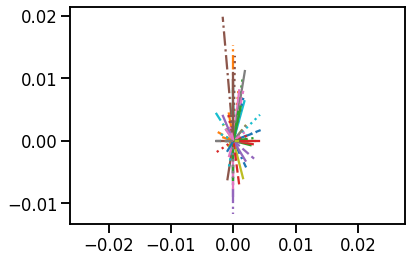

In [41]:
num_batch = 0
plot_prefered_directions(lasso_hist[num_batch, :, :].T)

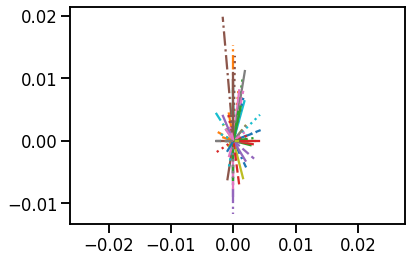

In [43]:
num = -1
plot_prefered_directions(lasso_hist[num_batch,:,:].T)

a quick comparision between the two shows that the observation matrix does not change. 
which basically makes sense, in the sense that 

## looking at K matrix

In [ ]:
NUM_EXP = 3
GLOBAL_FIGURE_VERTICAL_SIZE  = 4

figure_k_matrix, axes_k_matrix = plt.subplots(2,NUM_EXP,
                                          figsize = (GLOBAL_FIGURE_VERTICAL_SIZE * NUM_EXP,
                                                    GLOBAL_FIGURE_VERTICAL_SIZE * 2))
exp_data_all_reshaped = exp_data_all.reshape(3, N_RUNS)


#compare the K matrix before the exp
for i in range(NUM_EXP):
    K_mat = exp_data_all_reshaped[0,i]['feature_selection']['K_mat']
    K = K_mat[1].T

    plot_prefered_directions(K, ax  = axes_k_matrix[0, i], plot_states = [0,2])
    axes_k_matrix[0, i].set_title(exp_conds[i])

#compare to the matrix after the exp
for i in range(3):
    K_mat = exp_data_all[i]['feature_selection']['K_mat']
    
    K = K_mat[-1].T
    plot_prefered_directions(K, ax  = axes_k_matrix[1, i], plot_states = [0,2])
    axes_k_matrix[1,i].set_title(exp_conds[i])
figure_k_matrix.tight_layout()

In [ ]:



def plot_state_bar(K:np.ndarray, ax =  None, fig = fig, state_names = None):
    """
    K [np.array]: a state variable that records the state
    """
    
    num_state, num_var = K.shape
    
    if num_state >= num_var: print(f'Number of states {num_state} is greater than the {num_var} \n is this intended?')
        
    if ax is None: fig, ax = plt.subplots(2, 3, figsize = (12, 8),sharex =  True)
        
    var_pos = np.arange(num_var)
    
    for i in range(3):
        ax[0, i].bar(var_pos, K[i,:])
        ax[1,i].bar(var_pos, K[i + 3,:])
        
        
        
    fig.tight_layout()
    
    return ax


fig, ax = plt.subplots(2,3, figsize = (12,8))


for i in range(len(exp_data_all)):
    K_mat = exp_data_all[i]['feature_selection']['K_mat']
    K = K_mat[-1]

    plot_state_bar(abs(K), ax = ax, fig = fig)

In [259]:
active_feat_set = feature_selection_data['feat_set']
active_feat_set_last = active_feat_set[0]
active_angles_list = list()

least_num_updates = 180

for i,e in enumerate(exp_conds):
    feature_selection_data = exp_data_all[i]['feature_selection']
    enc_directions = feature_selection_data['sim_C']
    dec_directions = feature_selection_data['K_mat']

    dec_directions = np.moveaxis(dec_directions, 2,1)   
    

    angles_hist = calc_cosine_to_target_matrix(dec_directions,
                                               enc_directions)
    
    active_angles = np.mean(angles_hist[:, no_noise_neuron_ind], axis = 1)
    

    active_angles_list.append(active_angles[:least_num_updates])


/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


IndexError: list index out of range

In [ ]:

active_angles_list = np.array(active_angles_list)
active_angles_list = active_angles_list.reshape((3,N_RUNS,-1))

active_angles_mean = np.mean(active_angles_list, axis = 1)
active_angles_std = np.std(active_angles_list, axis = 1)

colors = ['blue', 'orange', 'red'] 

print(active_angles_mean.shape)

fig_C, ax_C = plt.subplots()



for i,c in enumerate(colors):

    plt.plot(active_angles_mean[i,:].T, color = c, linewidth = 3)
    plt.fill_between(batch_num,
                    active_angles_mean[i,:] + active_angles_std[i,:],
                    active_angles_mean[i,:] - active_angles_std[i,:],
                    alpha = 0.3, color = c)


plt.xlabel('Learner batch number')
plt.ylabel('Encoder-decoder error (deg.)')
plt.legend(['Full set', 'Iter add.', 'Subset'])

In [ ]:


fig_C, ax_C = plt.subplots()


colors = ['blue', 'orange'] 

batch_num = np.arange(least_num_updates) * 10

print(active_angles_mean.shape)

for i,c in enumerate(colors):

    plt.plot(batch_num, active_angles_mean[i,:].T, color = c, linewidth = 3)
    plt.fill_between(batch_num,
                    active_angles_mean[i,:] + active_angles_std[i,:],
                    active_angles_mean[i,:] - active_angles_std[i,:],
                    alpha = 0.3, color = c)

plt.title('Initial training on subset enables faster decoder convergence')
plt.xlabel('Training time (s)')
plt.ylabel('Encoder-decoder error (deg.)', fontsize = 14)
plt.legend(['Full set', 'Iter add.'])

In [ ]:
# examine the features after the first update.

def find_K_gain(index:int, update_period: float, fps = 60):
    """
    find the latest Kalman gain
    """
    update_frame_count = int(update_period * fps)
    
    return int(index // update_frame_count)
    
def test_find_K_gain():
    
    assert 0 == find_K_gain(598, 10, 60)
    assert 1 == find_K_gain(1198, 10, 60)

test_find_K_gain()

In [ ]:
update_time = 600

spike_counts = exp_data_all[0]['bmi3d_task']['spike_counts']
spike_counts = np.squeeze(spike_counts)

spike_counts_single_time = spike_counts[update_time, :]

target_state  = exp_data_all[0]['bmi3d_task']['target_state']
target_state_time = target_state[update_time, :]


num_K = find_K_gain(update_time, update_period = 10)
K_mat_time = K_mat[num_K]

feature_state_update = K_mat_time @  np.diag(spike_counts_single_time)


target_state_time_rep = np.tile(target_state_time, len(spike_counts_single_time))


useful_update = feature_state_update * target_state_time_rep
useful_update = np.sum(useful_update, axis = 0)


plt.plot(useful_update)


In [ ]:
intended_kin = exp_data_all[0]['bmi3d_clda']['intended_kin']

spike_counts_batch = exp_data_all[0]['bmi3d_clda']['spike_counts_batch']
spike_counts_batch =  np.swapaxes(spike_counts_batch, 2, 1)

intended_kin = np.swapaxes(intended_kin, 2, 1)

spike_counts_batch.shape

In [ ]:
print(intended_kin.shape)

intended_kin_one = intended_kin[1, 1, :]
print(intended_kin_one)

## Q mat

In [ ]:
feature_selection_data.keys()

In [ ]:
fig_Q, axes_Q = plt.subplots(1,2, sharey = True)

num_noises = 1

from afs_plotting import get_cmap
import matplotlib as mpl

cmap_q = get_cmap(num_noises)

cmap_q_1 = get_cmap(num_noises, mpl.cm.Oranges)

cmap_q_2 = get_cmap(num_noises, mpl.cm.Reds)

for i in range(num_noises):
    
    for j in range(3):


        Q_list = np.array(exp_data_all[j]["feature_selection"]['Q_diag'])



        Q_diag_no_noise = np.mean(Q_list[:, no_noise_neuron_ind], axis = 1)

        Q_diag_noise = np.mean(Q_list[:, noise_neuron_ind], axis = 1)



        axes_Q[0].plot(Q_diag_noise)

        axes_Q[1].plot(Q_diag_no_noise)

    

axes_Q[0].set_xlabel('Time (s)')

axes_Q[1].set_xlabel('Time (s)')



axes_Q[0].set_title('Low SNR neurons')

axes_Q[1].set_title('High SNR neurons')



# Feature analysis

In [ ]:
decoder_state = exp_data_all[0]['bmi3d_task']['decoder_state']
target_state = exp_data_all[0]['bmi3d_task']['target_state']
spike_counts = exp_data_all[0]['bmi3d_task']['spike_counts']


print(decoder_state.shape)
print(target_state.shape)
print(spike_counts.shape)

spike_counts = exp_data_all[0]['bmi3d_task'].dtype

In [ ]:
exp_data_all[0]['bmi3d_task'].dtype

In [ ]:
exp_data_all[0]['feature_selection']['K_mat'].shape

In [ ]:
exp_data_all[0]['bmi3d_task']['update_bmi']

In [ ]:
np.argwhere((exp_data_all[0]['bmi3d_task']['update_bmi']))

## examine used C mat

In [ ]:
GLOBAL_FIGURE_VERTICAL_SIZE  =  10

fig_compr_means, axes_compr_means = plt.subplots(1, N_TYPES_OF_NEURONS,
                                                figsize = (GLOBAL_FIGURE_VERTICAL_SIZE * N_TYPES_OF_NEURONS,
                                                          GLOBAL_FIGURE_VERTICAL_SIZE),
                                                sharey = True)
selected_feature_set = no_noise_neuron_list

for i,a in enumerate(axes_compr_means):

    type_neuron_list = neuron_type_bool_list[i]
    
    for C in C_mat_all:


        the_history_of_KF_weights_in_time_by_neurons = calc_a_history_of_matrix_L2norms_along_first_axis(C, 
                                                                                                         target_C = enc_directions)


        selected_neurons = np.logical_and(selected_feature_set, type_neuron_list)

        selected_mean = np.mean(the_history_of_KF_weights_in_time_by_neurons[:,selected_neurons], axis = 1)
        std = np.std(the_history_of_KF_weights_in_time_by_neurons[:,selected_neurons], axis = 1)
        
        line = a.plot(selected_mean)
        
        x_data = np.arange((selected_mean).shape[0])
        
        
        a.fill_between(x_data ,selected_mean - std, selected_mean + std, alpha = 0.1 )
        a.legend(exp_conds)
        
handles, labels = a.get_legend_handles_labels()
fig_compr_means.legend(handles, labels, loc='lower center')
plt.show()
#axes_compr_means.set_title('Means of the high SNR weight trajectory')

## debugging

In [ ]:
np.log(np.linalg.det((C.T @ Q_diag_inv @ np.diag(theta.value[:,0])@ C)))